In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')



: 

In [15]:
path = "/Users/antoniobaio/Desktop/Progetti/ProgettiDS/statsmodel/Time Series/ClimateChange/dataset/GlobalLandTemperaturesByCountry.csv"
global_temp_bycountry = pd.read_csv(path)

# Eliminiamo i paesi duplicati (nell'analisi non consideriamo la presenza di colonie in questi paesi)
# e i paesi per i quali non ci sono informazioni sulla temperatura.

global_temp_country_clear = global_temp_bycountry[~global_temp_bycountry['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
    ['Denmark (Europe)', 'France (Europe)',
     'Netherlands (Europe)', 'United Kingdom (Europe)'],
    ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Temperatura media per ogni paese

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] ==
                                               country]['AverageTemperature'].mean())

data = [dict(
    type='choropleth',
    locations=countries,
    z=mean_temp,
    locationmode='country names',
    text=countries,
    marker=dict(
        line=dict(color='rgb(0,0,0)', width=1)),
    colorbar=dict(autotick=True, tickprefix='',
                  title='# Temperatura\nmedia,\n°C'),
    # The following line is also needed to create Stream
    # stream = stream_id
)
]

layout = dict(
    title='Temperatura media dei paesi negli anni',
    geo=dict(
        showframe=False,
        showocean=True,
        oceancolor='rgb(0,255,255)',
        type='equirectangular'
    ),
)

avg_temp2 = dict(data=data, layout=layout)
py.iplot(avg_temp2, validate=False, filename='world_temp_map')



In [55]:
path = "/Users/antoniobaio/Desktop/Progetti/ProgettiDS/statsmodel/Time Series/ClimateChange/dataset/GlobalTemperatures.csv"
global_temp = pd.read_csv(path)

In [44]:
global_temp.drop(['LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperatureUncertainty', 'LandAndOceanAverageTemperature'], axis=1, inplace=True)
global_temp.dropna(inplace=True)

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp = global_temp[global_temp['dt'] >= '1850-01-01']
'''global_temp.set_index('Date', inplace=True)'''
global_temp.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105
1201,1850-02-01,3.071,1.275
1202,1850-03-01,4.954,0.955
1203,1850-04-01,7.217,0.665
1204,1850-05-01,10.004,0.617
1205,1850-06-01,13.150,0.614
1206,1850-07-01,14.492,0.614
1207,1850-08-01,14.039,0.802
1208,1850-09-01,11.505,0.675
1209,1850-10-01,8.091,0.863


## ANALISI DEL DATASET


In sintesi, il codice crea un nuovo DataFrame global_temp_country_clear contenente i dati di temperatura globale per tutti i paesi tranne quelli specificati nella lista. Successivamente, sostituisce i nomi dei paesi per uniformarli rispetto ad una convenzione comune.

In [56]:
# Extract the year from a dt
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x=years,
    y=np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill=None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x=years,
    y=np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x=years,
    y=mean_temp_world,
    name='Temperatura media',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Anno'),
    yaxis=dict(title='Temperatura media, °C'),
    title='Temperatura media del mondo negli anni',
    showlegend=False)

avg_temp1 = go.Figure(data=data, layout=layout)
py.iplot(avg_temp1)


In [57]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

global_temp['year'] = global_temp['dt'].dt.year
global_temp['month'] = global_temp['dt'].dt.month


In [59]:
global_temp.head(10)
global_temp.dropna(inplace=True)

In [61]:
global_temp.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5
1205,1850-06-01,13.150,0.614,18.946,2.817,7.106,0.857,16.353,0.245,1850,6
1206,1850-07-01,14.492,0.614,19.233,2.840,8.014,0.786,16.783,0.238,1850,7
1207,1850-08-01,14.039,0.802,18.477,2.079,7.406,1.086,16.718,0.280,1850,8
1208,1850-09-01,11.505,0.675,15.846,2.692,4.533,1.798,15.886,0.254,1850,9
1209,1850-10-01,8.091,0.863,13.189,2.338,2.013,2.133,14.831,0.297,1850,10


In [62]:
def season(month: int) -> str:
    match month:
        case 3 | 4 | 5:
            return 'spring'
        case 6 | 7 | 8:
            return 'summer'
        case 9 | 10 | 11:
            return 'autumn'
        case _:
            return 'winter'
        
global_temp['season'] = global_temp['month'].apply(season)
global_temp.head()

years = global_temp['year'].unique()

spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []

for year in years:
    current_df = global_temp[global_temp['year'] == year] #per ogni anno presente in year 
    spring_temp.append(
        current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean()) # calcola la media per spring
    summer_temp.append(
        current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean()) # calcola la media per summer
    autumn_temp.append(
        current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean()) # calcola la media per autumn
    winter_temp.append(
        current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean()) # calcola la media per winter


season = pd.DataFrame()
season['year'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp

season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1850,7.391667,13.893667,8.109667,2.207667
1,1851,7.530667,13.900000,8.590667,2.693000
2,1852,7.513333,13.660000,8.327000,2.900333
3,1853,7.531333,14.002667,8.342667,2.290667
4,1854,7.805000,13.803333,9.007333,2.226333


In [63]:
fig = px.line(season, x='year', y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], 
              title='Temperatura media del globo per ogni stagione', 
              labels={'year': 'Anno', 'value': 'Temperatura (°C)'},
              range_x=[season['year'].min(), season['year'].max()], 
              range_y=[season[['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp']].min().min(),
                       season[['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp']].max().max()],
              template= 'plotly_white')

fig.update_xaxes(dtick=15)
fig.update_yaxes(dtick=3)
fig.show()


In [66]:
global_temp.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,year,month,season
1200,1850-01-01,0.749,1.105,1850,1,winter
1201,1850-02-01,3.071,1.275,1850,2,winter
1202,1850-03-01,4.954,0.955,1850,3,spring
1203,1850-04-01,7.217,0.665,1850,4,spring
1204,1850-05-01,10.004,0.617,1850,5,spring
1205,1850-06-01,13.150,0.614,1850,6,summer
1206,1850-07-01,14.492,0.614,1850,7,summer
1207,1850-08-01,14.039,0.802,1850,8,summer
1208,1850-09-01,11.505,0.675,1850,9,autumn
1209,1850-10-01,8.091,0.863,1850,10,autumn


In [97]:
path = "/Users/antoniobaio/Desktop/Progetti/ProgettiDS/statsmodel/Time Series/ClimateChange/dataset/GlobalTemperatures.csv"
global_temp = pd.read_csv(path)

In [98]:
global_temp.drop(['LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty',
                 'LandAndOceanAverageTemperatureUncertainty', 'LandAndOceanAverageTemperature'], axis=1, inplace=True)
global_temp.dropna(inplace=True)

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp = global_temp[global_temp['dt'] >= '1900-01-01']

global_temp.rename(columns={'dt': 'Date', 'LandAverageTemperature': 'Temp',
                   'LandAverageTemperatureUncertainty': 'TempUncert'}, inplace=True)

global_temp.reset_index(drop=True, inplace=True)
global_temp.set_index('Date', inplace=True)

global_temp.head(10)


,Temp,TempUncert
Date,,
1900-01-01,1.461,0.276
1900-02-01,3.098,0.416
1900-03-01,5.492,0.261
1900-04-01,8.223,0.292
1900-05-01,11.385,0.357
1900-06-01,13.293,0.282
1900-07-01,14.171,0.345
1900-08-01,13.816,0.383
1900-09-01,11.955,0.293


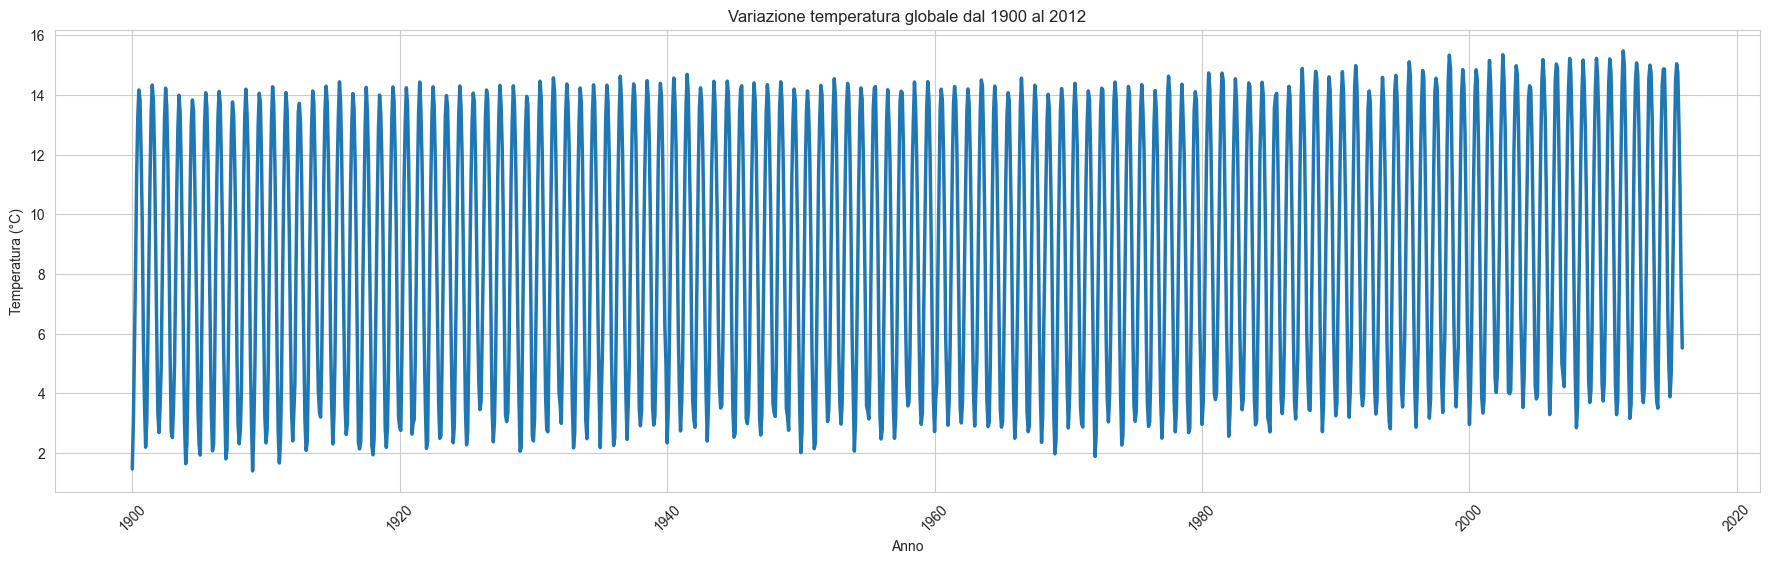

In [99]:
plt.figure(figsize=(22,6))
sns.set_style('whitegrid')
sns.lineplot(x=global_temp.index, y=global_temp['Temp'], linewidth=2.5)
plt.title('Variazione temperatura globale dal 1900 al 2015')
plt.xlabel('Anno', )
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.show()

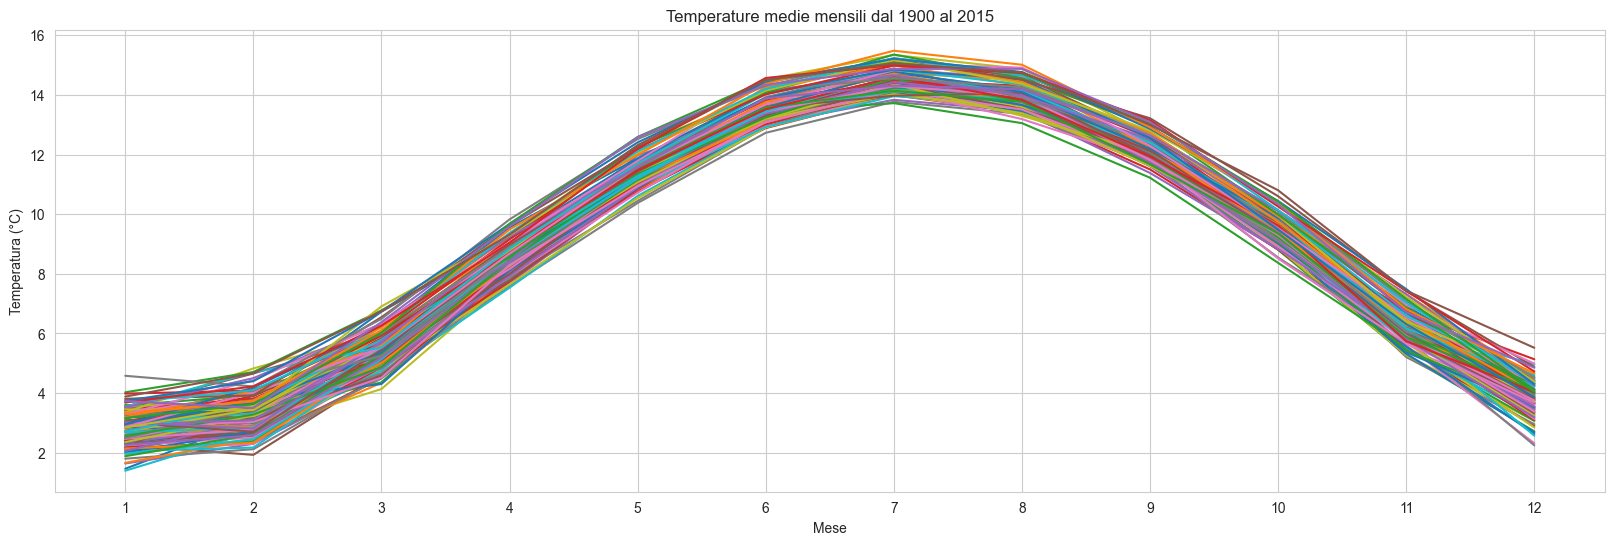

In [107]:
global_temp['month'] = global_temp.index.month
global_temp['year'] = global_temp.index.year

pivot = global_temp.pivot_table(values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Temperature medie mensili dal 1900 al 2015')
plt.xlabel('Mese')
plt.ylabel('Temperatura (°C)')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

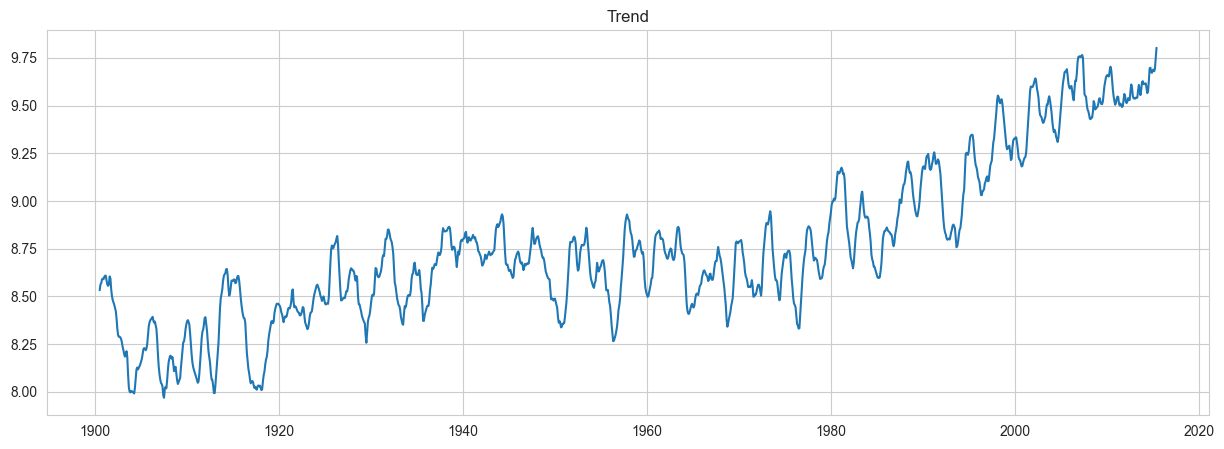

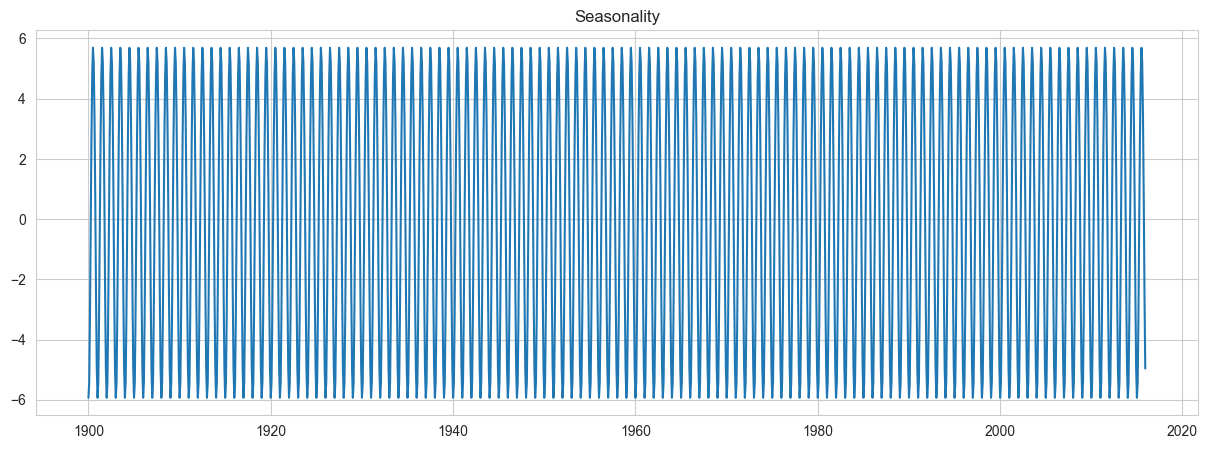

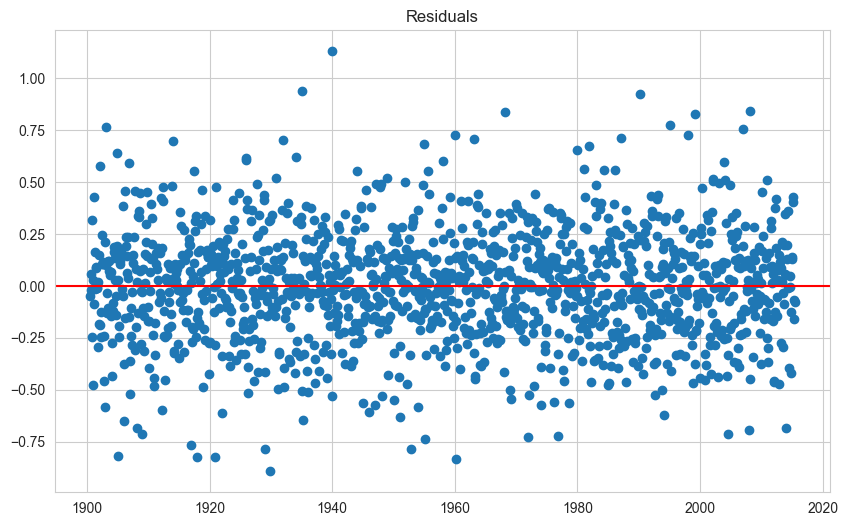

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposizione additiva della serie
decomposition = seasonal_decompose(global_temp['Temp'], model='additive')

# Grafico del trend
plt.figure(figsize=(15,5))
plt.plot(decomposition.trend)
plt.title('Trend')
plt.show()

# Grafico della stagionalità
plt.figure(figsize=(15,5))
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.show()

# Grafico dei residui
plt.figure(figsize=(10,6))
plt.scatter(decomposition.resid.index, decomposition.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals')
plt.show()

In [102]:
train = global_temp[:-60].copy()
val = global_temp[-60:-12].copy()
test = global_temp[-12:].copy()

In [103]:
baseline = val['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2011-02-01     3.282
2011-03-01     3.743
2011-04-01     6.101
2011-05-01     9.483
2011-06-01    11.986
Name: Temp, dtype: float64

ALTRA PROVA

In [108]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))


# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:, 0], baseline)
print(
    f'La RMSE della linea di base che cercheremo di diminuire è {round(rmse_base,4)} gradi celsius')


La RMSE della linea di base che cercheremo di diminuire è 2.2422 gradi celsius


In [126]:
'''stationarity test'''

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
adfinput = adfuller(train['Temp'])
adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
adftest = round(adftest,4)

for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4)
        
print(adftest)

if adftest[0].round(2) < adftest[5].round(2):
    print('\nLa statistica del test è inferiore al valore critico del 5%. \nLa serie sembra essere stazionaria.')
else:
    print("\nLa statistica del test è superiore al valore critico del 5%. \nLa serie non è stazionaria.")

Results of Dickey-Fuller Test:
Test Statistic                   -0.9113
p-value                           0.7842
Lags Used                        23.0000
Number of Observations Used    1308.0000
Critical Value (1%)              -3.4354
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5679
dtype: float64

La statistica del test è superiore al valore critico del 5%. 
La serie non è stazionaria.


In [ ]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Variazione temperatura del globo')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nLa statistica del test è inferiore al valore critico del 5%. \nLa serie sembra essere stazionaria.')
    else:
        print("\nLa statistica del test è superiore al valore critico del 5%. \nLa serie non è stazionaria.")

: 

Results of Dickey-Fuller Test:
Test Statistic                  -12.2277
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1296.0000
Critical Value (1%)              -3.4354
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

La statistica del test è inferiore al valore critico del 5%. 
La serie sembra essere stazionaria.


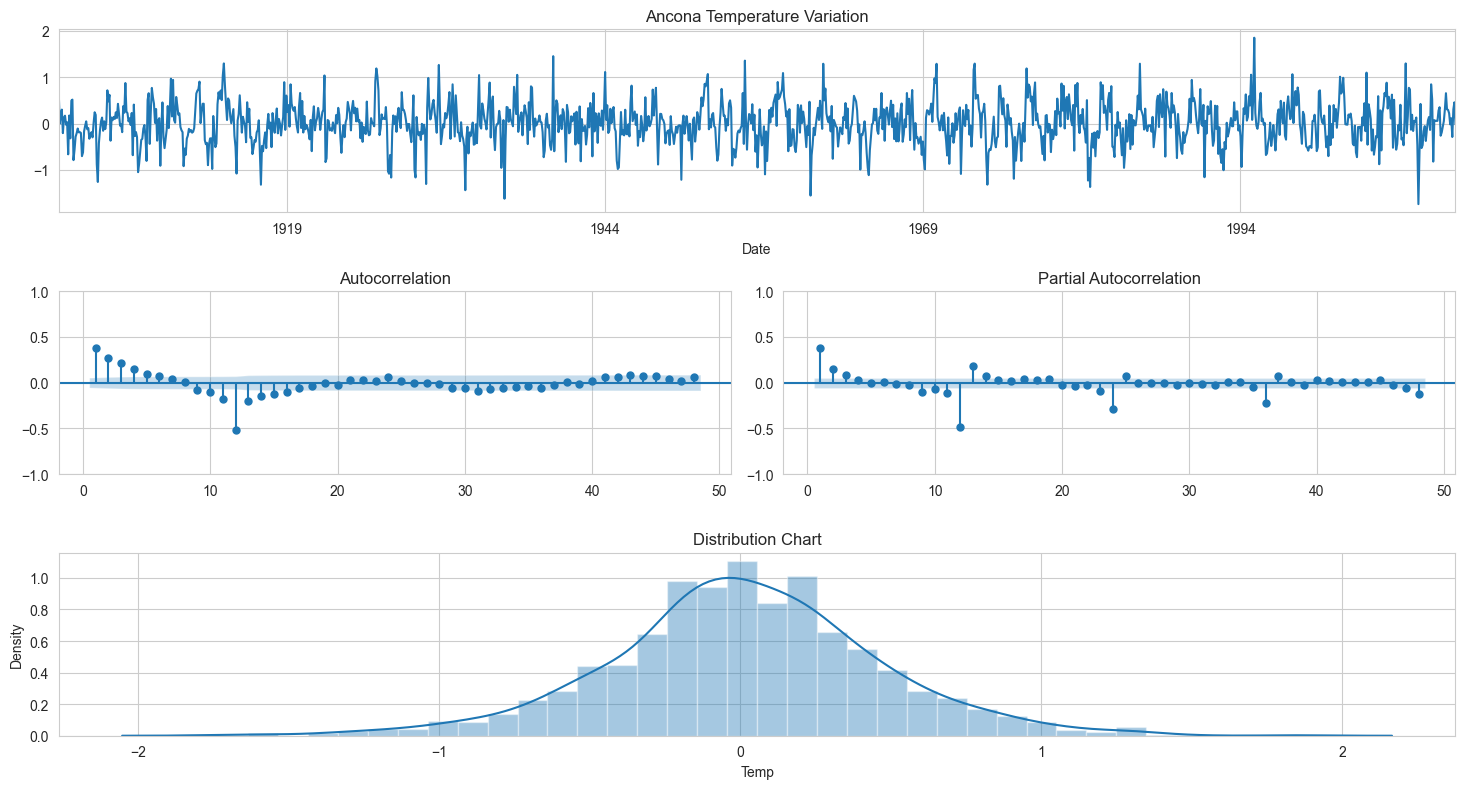

In [128]:
check_stationarity(train['Temp'].diff(12).dropna())

In [3]:
temperature_city = pd.read_csv("/Users/antoniobaio/Desktop/Progetti/ProgettiDS/statsmodel/Time Series/ClimateChange/dataset/GlobalLandTemperaturesByCity.csv")

In [6]:
def convert_coordinates(coord):
    direction = coord[-1]
    degrees = float(coord[:-1])
    if direction in ['S', 'W']:
        degrees = -degrees
    return degrees

Certamente! Ecco alcune idee per l'analisi temporale del dataset "temperature_city":

1. Analisi della temperatura media nel tempo: Puoi utilizzare il dataset per analizzare l'andamento della temperatura media globale nel tempo, suddividendolo per anno, mese o stagione. Puoi creare grafici lineari, aree o a barre per visualizzare i cambiamenti della temperatura media nel tempo.

3. Analisi delle temperature medie per città e nazione: Puoi analizzare le temperature medie per città e nazione, creando grafici a barre o a dispersione per visualizzare le differenze nella temperatura media tra le diverse città o nazioni.

4. Analisi delle temperature medie per latitudine e longitudine: Puoi analizzare le temperature medie in base alla posizione geografica delle città, suddividendole per latitudine e longitudine. In questo modo potrai capire se ci sono correlazioni tra la temperatura e la posizione geografica delle città.

5. Analisi delle anomalie termiche: Puoi analizzare le anomalie termiche, ovvero la differenza tra la temperatura media di un anno specifico e la temperatura media di un periodo di riferimento. In questo modo potrai individuare gli anni in cui si sono verificate variazioni significative della temperatura rispetto alla media.

Queste sono solo alcune idee per l'analisi temporale del dataset "temperature_city". Naturalmente, ci sono molte altre analisi e visualizzazioni che puoi creare a seconda dei tuoi obiettivi e delle tue domande di ricerca.

In [7]:
temperature_city['dt'] = pd.to_datetime(temperature_city['dt'])

temperature_city['AverageTemperature'] = temperature_city['AverageTemperature'].fillna(
    temperature_city.groupby([temperature_city['dt'].dt.month, 
                              temperature_city['City']])['AverageTemperature'].transform('mean'))

temperature_city['year'] = temperature_city['dt'].dt.year
temperature_city['month'] = temperature_city['dt'].dt.month

# Convertiamo le colonne Latitude e Longitude nel formato numerico
temperature_city['Latitude'] = temperature_city['Latitude'].apply(convert_coordinates)
temperature_city['Longitude'] = temperature_city['Longitude'].apply(convert_coordinates)

temperature_city = temperature_city.query("year != 1743")

temperature_city

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
2,1744-01-01,-0.496834,NaN,Århus,Denmark,57.05,10.33,1744,1
3,1744-02-01,-0.125409,NaN,Århus,Denmark,57.05,10.33,1744,2
4,1744-03-01,1.764966,NaN,Århus,Denmark,57.05,10.33,1744,3
5,1744-04-01,5.788000,3.624,Århus,Denmark,57.05,10.33,1744,4
6,1744-05-01,10.644000,1.283,Århus,Denmark,57.05,10.33,1744,5
...,...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464000,0.236,Zwolle,Netherlands,52.24,5.26,2013,5
8599208,2013-06-01,15.043000,0.261,Zwolle,Netherlands,52.24,5.26,2013,6
8599209,2013-07-01,18.775000,0.193,Zwolle,Netherlands,52.24,5.26,2013,7
8599210,2013-08-01,18.025000,0.298,Zwolle,Netherlands,52.24,5.26,2013,8


In [11]:
'''temperature of Italy '''

ita = temperature_city[temperature_city['Country'] == 'Italy']
ita


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
287784,1744-01-01,5.587042,NaN,Ancona,Italy,44.20,13.42,1744,1
287785,1744-02-01,6.108258,NaN,Ancona,Italy,44.20,13.42,1744,2
287786,1744-03-01,8.454528,NaN,Ancona,Italy,44.20,13.42,1744,3
287787,1744-04-01,13.583000,2.085,Ancona,Italy,44.20,13.42,1744,4
287788,1744-05-01,14.910000,1.761,Ancona,Italy,44.20,13.42,1744,5
...,...,...,...,...,...,...,...,...,...
8012233,2013-05-01,15.530000,0.435,Vicenza,Italy,45.81,12.69,2013,5
8012234,2013-06-01,19.982000,0.365,Vicenza,Italy,45.81,12.69,2013,6
8012235,2013-07-01,23.850000,0.626,Vicenza,Italy,45.81,12.69,2013,7
8012236,2013-08-01,22.831000,0.772,Vicenza,Italy,45.81,12.69,2013,8


In [12]:
ita_city = ['Milan', 'Rome', 'Ancona']

temp = ita[ita['City'].isin(ita_city)]
temp = temp.drop(['AverageTemperatureUncertainty', 'Latitude', 'Longitude', 'Country', 'month'], axis=1)
temp = temp.groupby(['City', 'year'])['AverageTemperature'].mean().reset_index()

temp

,City,year,AverageTemperature
0,Ancona,1744,13.651725
1,Ancona,1745,13.535552
2,Ancona,1746,13.839875
3,Ancona,1747,13.839875
4,Ancona,1748,13.839875
...,...,...,...
805,Rome,2009,13.280167
806,Rome,2010,12.628500
807,Rome,2011,13.463167
808,Rome,2012,13.454167


In [13]:
temp = temp.groupby(['City', 'year'])['AverageTemperature'].mean().reset_index()

In [15]:
fig = px.line(temp, x='year', y='AverageTemperature', color='City',
              title='Temperatura media annuale a Milano e Roma',
              range_x=[temp['year'].min(), temp['year'].max()], 
              range_y=[temp['AverageTemperature'].min(), temp['AverageTemperature'].max()],
              labels= {'year': 'Anno', 'AverageTemperature': 'Temperatura (°C)'},
              )

fig.update_xaxes(dtick=15)
fig.update_yaxes(dtick=1)
fig.show()